# **Import libraries**

In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("/kaggle/input/pepsico-daily-data/PEP.csv")
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13167 entries, 0 to 13166
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13167 non-null  object 
 1   Open    13167 non-null  float64
 2   High    13167 non-null  float64
 3   Low     13167 non-null  float64
 4   Close   13167 non-null  float64
 5   Volume  13167 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 617.3+ KB
None
         Date      Open      High       Low     Close  Volume
0  1972-06-01  0.000000  0.399388  0.394770  0.399388  318600
1  1972-06-02  0.399388  0.403428  0.398233  0.398233  140400
2  1972-06-05  0.399391  0.399970  0.386078  0.393603  469800
3  1972-06-06  0.390130  0.390130  0.388973  0.390130  140400
4  1972-06-07  0.390130  0.390709  0.386657  0.387815  178200
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
               Open          High           Low         Close        V

In [3]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200


In [5]:
# Handle potential anomalies
df = df[(df[['Open', 'High', 'Low', 'Close']] != 0).all(axis=1)]

# **EDA**

In [6]:
# Time Series Plot - Closing Price
fig = px.line(df, x='Date', y='Close', title='PepsiCo Closing Price Over Time')
fig.show()

# Volume Over Time
fig = px.line(df, x='Date', y='Volume', title='PepsiCo Trading Volume Over Time', color_discrete_sequence=['orange'])
fig.show()

# Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.update_layout(title='PepsiCo Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

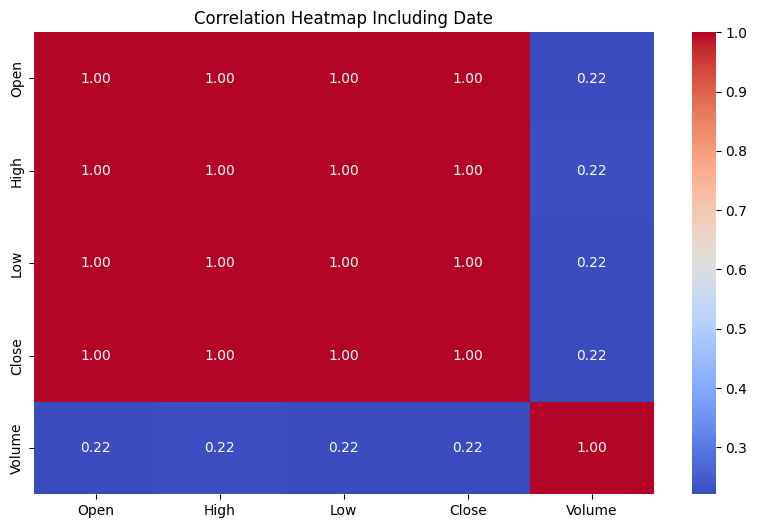

In [7]:

# Drop the Date column
df = df.drop(columns=['Date'])


# Include Date_Ordinal in the correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including Date')
plt.show()

# **Models**

* **LinearRegression**

In [8]:

X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("R-squared:", model.score(X_test, y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.9999691681424263
Mean Absolute Error (MAE): 0.1235717954193756
Mean Squared Error (MSE): 0.062483789161755295
Root Mean Squared Error (RMSE): 0.24996757622090768


* **Ridge Regression**

In [9]:


# Define and train the model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R-squared:", model.score(X_test, y_test))


R-squared: 0.9999691638302775


*  **Lasso Regression**

In [10]:
from sklearn.linear_model import Lasso

# Define and train the model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R-squared:", model.score(X_test, y_test))


R-squared: 0.9998430935072815


* **Random Forest Regression**

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R-squared:", model.score(X_test, y_test))


R-squared: 0.9999540793954481


* **LSTM**

13105/13105 ━━━━━━━━━━━━━━━━━━━━ 268s 20ms/step - loss: 7.2703e-04
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


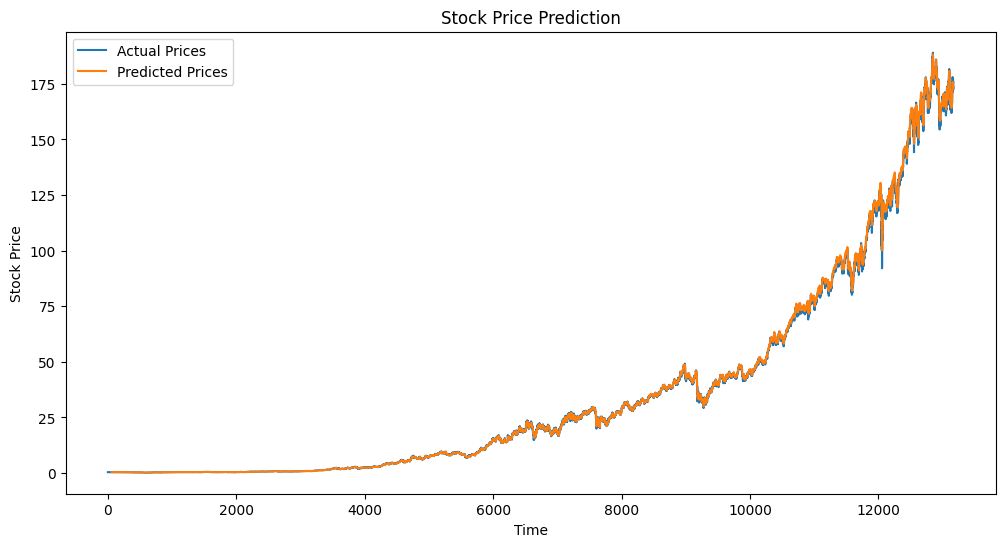

In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Create a dataset with X_train and y_train
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Look back 60 days to predict the next day's price
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=1)

# Predicting
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Prices')
plt.plot(range(look_back, look_back + len(predicted_prices)), predicted_prices, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [13]:

y_true = df['Close'].values[look_back:look_back + len(predicted_prices)]
y_pred = predicted_prices[:, 0]

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.46542675217705254
Mean Squared Error (MSE): 0.9514527555627746
Root Mean Squared Error (RMSE): 0.9754243976663566
R-squared (R²): 0.9995456965820673
